DBSCAN [Documentation](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.DBSCAN.html)

DBSCAN [Demo](https://scikit-learn.org/stable/auto_examples/cluster/plot_dbscan.html)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA

# First file, RECOMPLE_

In [2]:
df_re = pd.read_excel('RCOMPL_RIG_SCALED.xlsx')

In [3]:
#imputation

subset_re = df_re[df_re['CONTRACTOR'].notnull()]

quant_df_re = subset_re.loc[:, subset_re.dtypes == float]
mean_repl_re = quant_df_re.isna().sum()
imputed_df_re = quant_df_re.apply(lambda col: col.fillna(col.mean()), axis=0)
imputed_df_re.dropna(inplace=True, axis=1)

In [4]:
imputed_df_re

,FRAC_GRADIENT,BREAKDOWN_PRESSURE,HYDROSTATIC_PRESSURE,TREAT_AVG_PRESSURE,TREAT_MAX_PRESSURE,TREAT_MIN_PRESSURE,PROPPANT_DESIGNED,PROPPANT_IN_WELLBORE,AVG_HYDRAULIC_POWER,MAX_PUMP_POWER,...,PUMPSONLINENO,USERNUM1,USERNUM3,DURPUMP,TOP_DEPTH_TVD,PROPOSED,Prod_Per_Stage,Errors_Per_Stage,AVG PRESSURE (PSI),AVG HHP
0,1.0,8895.0,5493.000000,8823.0,9305.0,56.000000,375000.0,0.000000,13249.0,15279.0,...,16.912766,18.386117,16.246809,114.157718,12511.0,0.000000,6810.777778,2.555556,8823.0,13249.00000
1,1.0,6183.0,5212.000000,9378.0,9551.0,7032.137177,351900.0,0.000000,20645.0,21433.0,...,18.000000,19.000000,18.000000,84.000000,12010.0,0.004756,1426.962963,5.129630,9378.0,20645.00000
2,1.0,6987.0,5188.000000,9666.0,9785.0,7032.137177,351880.0,0.000000,17179.0,17813.0,...,18.000000,19.000000,18.000000,105.000000,11965.0,0.004756,1426.962963,5.129630,9666.0,17179.00000
3,1.0,8031.0,5493.000000,8179.0,8514.0,7666.000000,340625.0,0.000000,13932.0,14606.0,...,16.912766,18.386117,16.246809,114.157718,12511.0,0.000000,6810.777778,2.555556,8179.0,14415.33085
4,1.0,6524.0,5508.000000,9512.0,10003.0,7032.137177,425000.0,0.000000,16051.0,18228.0,...,18.000000,18.000000,18.000000,137.000000,12704.0,0.004756,739.320000,7.400000,9512.0,16051.00000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
959,1.0,5958.0,5418.390608,8483.0,9008.0,7032.137177,367500.0,3146.914894,16864.0,15627.0,...,18.000000,20.000000,18.000000,114.157718,11785.0,0.004756,2933.909091,8.340909,8483.0,15627.00000
960,1.0,6045.0,5418.390608,9276.0,9466.0,7032.137177,367500.0,3146.914894,12921.0,12332.0,...,17.000000,20.000000,17.000000,114.157718,11698.0,0.004756,2933.909091,8.340909,9276.0,12332.00000
961,1.0,5335.0,5418.390608,8561.0,9179.0,7032.137177,367500.0,3146.914894,17018.0,15580.0,...,18.000000,20.000000,18.000000,114.157718,11767.0,0.004756,2933.909091,8.340909,8561.0,15580.00000
962,1.0,5255.0,5110.000000,8442.0,9121.0,7032.137177,367500.0,3146.914894,15543.0,17012.0,...,18.000000,18.000000,18.000000,111.000000,11799.0,0.000000,2933.909091,8.340909,8442.0,15543.00000


In [5]:
imputed_df_re.describe()

,FRAC_GRADIENT,BREAKDOWN_PRESSURE,HYDROSTATIC_PRESSURE,TREAT_AVG_PRESSURE,TREAT_MAX_PRESSURE,TREAT_MIN_PRESSURE,PROPPANT_DESIGNED,PROPPANT_IN_WELLBORE,AVG_HYDRAULIC_POWER,MAX_PUMP_POWER,...,PUMPSONLINENO,USERNUM1,USERNUM3,DURPUMP,TOP_DEPTH_TVD,PROPOSED,Prod_Per_Stage,Errors_Per_Stage,AVG PRESSURE (PSI),AVG HHP
count,964.0,964.000000,964.000000,964.000000,964.000000,964.000000,9.640000e+02,9.640000e+02,964.000000,964.000000,...,964.000000,964.000000,964.000000,964.000000,964.000000,964.000000,964.000000,964.000000,964.000000,964.000000
mean,1.0,6790.164474,5418.390608,8590.303219,9033.909657,7032.137177,3.192338e+05,3.146915e+03,14413.226611,15895.960172,...,16.912766,18.386117,16.246809,114.157718,12484.094990,0.004756,7023.362773,4.232510,8619.812885,14525.582193
std,0.0,1421.189510,279.778760,975.754367,946.531860,1016.987497,1.215901e+05,4.626759e+04,2699.588302,4248.795004,...,1.469462,1.065493,1.623225,22.216708,538.997129,0.064296,11052.629536,6.015650,963.974823,2550.993553
min,1.0,0.000000,498.000000,4888.000000,5295.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,...,0.000000,13.000000,0.000000,0.000000,11128.000000,0.000000,-1.000000,-1.000000,881.000000,4001.000000
25%,1.0,6449.000000,5306.000000,8010.500000,8535.500000,7032.137177,2.500000e+05,0.000000e+00,12696.000000,14083.000000,...,16.912766,18.000000,16.246809,114.157718,12224.000000,0.000000,0.000000,2.700000,8076.500000,12832.250000
50%,1.0,6790.164474,5439.000000,8697.000000,9178.000000,7032.137177,3.500000e+05,0.000000e+00,14104.500000,15519.500000,...,16.912766,18.386117,16.246809,114.157718,12511.000000,0.000000,2062.420000,3.888889,8687.500000,14284.500000
75%,1.0,7409.000000,5580.000000,9326.250000,9722.500000,7454.750000,3.840000e+05,0.000000e+00,15827.250000,17280.750000,...,17.000000,18.386117,17.000000,114.157718,12867.000000,0.000000,6810.777778,6.281250,9319.000000,15821.500000
max,1.0,10223.000000,5891.000000,10388.000000,10729.000000,9170.000000,1.273750e+06,1.299320e+06,23916.000000,114785.000000,...,22.000000,22.000000,22.000000,317.000000,13626.000000,1.000000,43054.419355,170.000000,10388.000000,21795.000000


In [6]:
mean_repl_re

FRAC_GRADIENT                    251
BREAKDOWN_PRESSURE               204
HYDROSTATIC_PRESSURE              27
TREAT_AVG_PRESSURE                 1
TREAT_MAX_PRESSURE                 1
TREAT_MIN_PRESSURE               461
PROPPANT_DESIGNED                  1
PROPPANT_IN_WELLBORE             212
AVG_HYDRAULIC_POWER                2
MAX_PUMP_POWER                    35
MAX_PUMP_RATING                  155
TREAT_AVG_RATE                     1
TREAT_MAX_RATE                     1
TREAT_MIN_RATE                     5
POST_INSTANT_SHUT_IN_PRESSURE    283
INITIAL_SHUT_IN_PRESSURE          45
PRE_INSTANT_SHUT_IN_PRESSURE     263
STG_ELEMENT_TOP_DEPTH            726
STG_ELEMENT_BOTTOM_DEPTH         726
STG_INITIAL_PUMPING_PRESSURE     461
STG_FINAL_PUMPING_PRESSURE         1
STG_BREAKDOWN_PRESSURE           204
STG_VOLUME_RECOVERED             392
PUMPSONLINENO                    494
USERNUM1                         503
USERNUM3                         494
DURPUMP                          666
T

In [7]:
#dataframe scaling

scaler = MinMaxScaler()
scaled_df_re = pd.DataFrame(scaler.fit_transform(imputed_df_re), columns=imputed_df_re.columns)

In [8]:
scaled_df_re

,FRAC_GRADIENT,BREAKDOWN_PRESSURE,HYDROSTATIC_PRESSURE,TREAT_AVG_PRESSURE,TREAT_MAX_PRESSURE,TREAT_MIN_PRESSURE,PROPPANT_DESIGNED,PROPPANT_IN_WELLBORE,AVG_HYDRAULIC_POWER,MAX_PUMP_POWER,...,PUMPSONLINENO,USERNUM1,USERNUM3,DURPUMP,TOP_DEPTH_TVD,PROPOSED,Prod_Per_Stage,Errors_Per_Stage,AVG PRESSURE (PSI),AVG HHP
0,0.0,0.870097,0.926201,0.715455,0.737946,0.006107,0.294406,0.000000,0.553981,0.133110,...,0.768762,0.598457,0.738491,0.360119,0.553643,0.000000,0.158210,0.020793,0.835384,0.519726
1,0.0,0.604813,0.874096,0.816364,0.783217,0.766863,0.276271,0.000000,0.863230,0.186723,...,0.818182,0.666667,0.818182,0.264984,0.353082,0.004756,0.033166,0.035846,0.893762,0.935371
2,0.0,0.683459,0.869646,0.868727,0.826279,0.766863,0.276255,0.000000,0.718306,0.155186,...,0.818182,0.666667,0.818182,0.331230,0.335068,0.004756,0.033166,0.035846,0.924056,0.740587
3,0.0,0.785582,0.926201,0.598364,0.592381,0.835987,0.267419,0.000000,0.582539,0.127247,...,0.768762,0.598457,0.738491,0.360119,0.553643,0.000000,0.158210,0.020793,0.767645,0.585272
4,0.0,0.638169,0.928982,0.840727,0.866397,0.766863,0.333660,0.000000,0.671141,0.158801,...,0.818182,0.555556,0.818182,0.432177,0.630905,0.004756,0.017195,0.049123,0.907857,0.677195
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
959,0.0,0.582803,0.912366,0.653636,0.683290,0.766863,0.288518,0.002422,0.705135,0.136141,...,0.818182,0.777778,0.818182,0.360119,0.263010,0.004756,0.068166,0.054625,0.799621,0.653366
960,0.0,0.591314,0.912366,0.797818,0.767575,0.766863,0.288518,0.002422,0.540266,0.107436,...,0.772727,0.777778,0.772727,0.360119,0.228183,0.004756,0.068166,0.054625,0.883034,0.468192
961,0.0,0.521862,0.912366,0.667818,0.714759,0.766863,0.288518,0.002422,0.711574,0.135732,...,0.818182,0.777778,0.818182,0.360119,0.255805,0.004756,0.068166,0.054625,0.807826,0.650725
962,0.0,0.514037,0.855183,0.646182,0.704085,0.766863,0.288518,0.002422,0.649900,0.148208,...,0.818182,0.555556,0.818182,0.350158,0.268615,0.000000,0.068166,0.054625,0.795309,0.648646


In [9]:
#run the data through PCA first, preparing for DBSCAN model

data_re = scaled_df_re.to_numpy()
pca = PCA(n_components=10)
reduced_data_re = pca.fit_transform(data_re)

Still need to play around different `eps` and `min_sample` values 

Estimated number of clusters: 6
Estimated number of noise points: 28
Silhouette Coefficient: 0.230


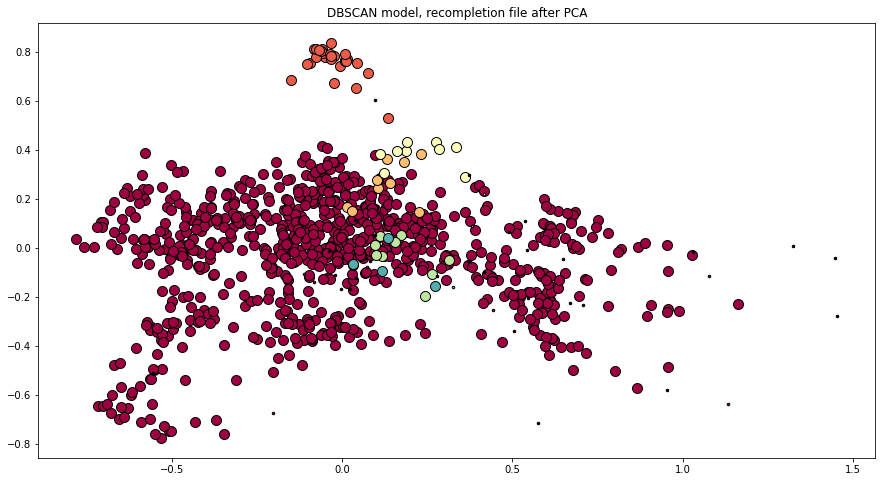

In [86]:
ep = 0.5
min_sam = 5

X1 = reduced_data_re
db_re = DBSCAN(eps=ep, min_samples=min_sam).fit(X1)
core_samples_mask = np.zeros_like(db_re.labels_, dtype=bool)
core_samples_mask[db_re.core_sample_indices_] = True
labels = db_re.labels_

n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

print('Estimated number of clusters: %d' % n_clusters_)
print('Estimated number of noise points: %d' % n_noise_)
print("Silhouette Coefficient: %0.3f" % silhouette_score(X1, labels))


fig = plt.gcf()
fig.set_size_inches(15,8)
unique_labels = set(labels)
colors = [plt.cm.Spectral(each)
          for each in np.linspace(0, 1, len(unique_labels))]

for k, col in zip(unique_labels, colors):
    if k == -1:
        col = [0, 0, 0, 1]    #noise_label

    class_member_mask = (labels == k)

    xy = X1[class_member_mask & core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markeredgecolor='k', markerfacecolor=tuple(col), markersize=10)

    xy = X1[class_member_mask & ~core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], '.', markeredgecolor='k', markerfacecolor=tuple(col), markersize=5)

plt.title('DBSCAN model, recompletion file after PCA')
plt.show()

In [11]:
labels

array([-1,  0,  0,  0,  0,  0,  0,  1,  1, -1,  0,  1,  1,  1,  0,  0,  0,
        0,  0,  0,  0,  0, -1,  0,  0,  1,  1,  0,  0,  0,  0,  0,  0,  1,
        0,  0,  0,  0,  0,  0,  0,  1,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1,  1,  0,  0, -1,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  1,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0, -1,  0,  0,  0,  0,  0,  0,  0,  1,  0,  0,
        0,  1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1,  0,  0,
        0, -1,  0,  0,  1,  0,  0,  1,  0,  0,  0,  1,  1,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1,  0,  1,  0,  0,
        0,  0,  0,  1,  0,  1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0

# Second file, STMSTG

In [12]:
df_stm = pd.read_excel('STMSTG_RIG_SCALED.xlsx')

In [13]:
subset_stm = df_stm[df_stm['CONTRACTOR'].notnull()]

quant_df_stm = subset_stm.loc[:, subset_stm.dtypes == float]
mean_repl_stm = quant_df_stm.isna().sum()
imputed_df_stm = quant_df_stm.apply(lambda col: col.fillna(col.mean()), axis=0)
imputed_df_stm.dropna(inplace=True, axis=1)

In [14]:
imputed_df_stm

,FRAC_GRADIENT,BREAKDOWN_PRESSURE,HYDROSTATIC_PRESSURE,TREAT_AVG_PRESSURE,TREAT_MAX_PRESSURE,TREAT_MIN_PRESSURE,PROPPANT_DESIGNED,PROPPANT_IN_WELLBORE,AVG_HYDRAULIC_POWER,MAX_PUMP_POWER,...,USERNUM3,DURPUMP,TOP_DEPTH_TVD,BOTTOM_DEPTH_TVD,PROPOSED,Stage_Length (meters),Prod_Per_Stage,Errors_Per_Stage,AVG PRESSURE (PSI),AVG HHP
0,1.0,9723.0,5584.0,10176.0,10793.0,7695.580886,420000.0,0.000000,18928.0,21114.0,...,15.00000,128.000000,12903.0,12910.0,0.015256,146.0,16627.394737,9.894737,10176.0,18928.0
1,1.0,7078.0,5661.0,11000.0,11249.0,7695.580886,420000.0,0.000000,22512.0,24213.0,...,19.00000,102.000000,13051.0,13055.0,0.000000,144.0,-1.000000,-1.000000,11000.0,22512.0
2,1.0,7790.0,5466.0,10125.0,10897.0,7730.000000,520000.0,0.000000,20911.0,23060.0,...,16.41019,112.666165,12599.0,12609.0,0.000000,143.0,38722.187500,9.093750,10125.0,20911.0
3,1.0,7956.0,5543.0,10295.0,10652.0,7695.580886,420000.0,0.000000,20215.0,21584.0,...,19.00000,112.666165,12764.0,12791.0,0.000000,143.0,12636.820000,7.520000,10295.0,20215.0
4,1.0,6402.0,5605.0,10958.0,11200.0,7695.580886,420000.0,0.000000,22862.0,25110.0,...,19.00000,107.000000,12923.0,12928.0,0.015256,145.0,-1.000000,-1.000000,10958.0,22862.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12011,1.0,6480.0,5160.0,9842.0,10159.0,7780.000000,420000.0,9464.558883,19688.0,21908.0,...,17.00000,95.000000,11902.0,11900.0,0.000000,145.0,-1.000000,-1.000000,9842.0,19688.0
12012,1.0,7257.0,5171.0,9673.0,10094.0,7695.580886,420000.0,9464.558883,18702.0,20446.0,...,13.00000,105.000000,11926.0,11921.0,0.000000,147.0,-1.000000,-1.000000,9673.0,18702.0
12013,1.0,5212.0,5041.0,9896.0,10187.0,7695.580886,420000.0,9464.558883,19012.0,22652.0,...,16.00000,117.000000,11644.0,11639.0,0.015256,146.0,-1.000000,-1.000000,9896.0,19012.0
12014,1.0,6870.0,5056.0,10005.0,10209.0,7695.580886,420000.0,9464.558883,17839.0,19767.0,...,15.00000,110.000000,11663.0,11656.0,0.000000,183.0,-1.000000,-1.000000,10000.0,17839.0


In [15]:
imputed_df_stm.describe()

,FRAC_GRADIENT,BREAKDOWN_PRESSURE,HYDROSTATIC_PRESSURE,TREAT_AVG_PRESSURE,TREAT_MAX_PRESSURE,TREAT_MIN_PRESSURE,PROPPANT_DESIGNED,PROPPANT_IN_WELLBORE,AVG_HYDRAULIC_POWER,MAX_PUMP_POWER,...,USERNUM3,DURPUMP,TOP_DEPTH_TVD,BOTTOM_DEPTH_TVD,PROPOSED,Stage_Length (meters),Prod_Per_Stage,Errors_Per_Stage,AVG PRESSURE (PSI),AVG HHP
count,12016.000000,12016.000000,12016.000000,12016.000000,12016.000000,12016.000000,1.201600e+04,1.201600e+04,12016.000000,12016.000000,...,12016.000000,12016.000000,12016.000000,12016.000000,12016.000000,12016.000000,12016.000000,12016.000000,12016.000000,12016.000000
mean,0.986751,7781.650875,5309.693112,9906.170801,10429.599301,7695.580886,4.178435e+05,9.464559e+03,19126.906767,21079.249309,...,16.410190,112.666165,12386.503190,12386.748278,0.015256,340.913956,15888.488395,5.100075,10075.479895,19335.519472
std,0.114291,1364.405956,775.580787,1332.704801,1640.282585,727.579826,1.290454e+05,4.972320e+04,5265.077398,4554.608397,...,2.274517,29.176891,653.244116,665.125653,0.115583,964.983673,24931.941895,4.937704,2507.540557,3726.763131
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,...,0.000000,0.000000,5.000000,5.000000,0.000000,-2945.000000,-1.000000,-1.000000,8.000000,0.000000
25%,1.000000,7334.750000,5166.000000,9736.000000,10288.000000,7695.580886,4.170000e+05,0.000000e+00,17604.000000,19774.750000,...,16.410190,112.666165,11964.750000,11958.000000,0.000000,143.000000,-1.000000,-1.000000,9766.000000,17772.500000
50%,1.000000,7902.000000,5425.000000,10166.000000,10715.500000,7695.580886,4.200000e+05,0.000000e+00,19850.000000,21962.000000,...,16.410190,112.666165,12508.000000,12499.000000,0.000000,145.000000,2029.974725,6.731707,10164.000000,19843.000000
75%,1.000000,8451.000000,5586.000000,10488.000000,10990.000000,7695.580886,5.200000e+05,9.464559e+03,21417.000000,23451.000000,...,17.000000,112.666165,12879.000000,12885.000000,0.000000,146.000000,26219.166667,8.900000,10487.000000,21404.250000
max,2.000000,11190.000000,48884.000000,11394.000000,109745.000000,10972.000000,1.273750e+06,1.299320e+06,233409.000000,224687.000000,...,22.000000,616.000000,13741.000000,13744.000000,1.000000,6008.000000,184940.941176,170.000000,109043.000000,188230.000000


In [16]:
mean_repl_stm

FRAC_GRADIENT                     317
BREAKDOWN_PRESSURE                238
HYDROSTATIC_PRESSURE               67
TREAT_AVG_PRESSURE                  2
TREAT_MAX_PRESSURE                  2
TREAT_MIN_PRESSURE               6669
PROPPANT_DESIGNED                   1
PROPPANT_IN_WELLBORE             4637
AVG_HYDRAULIC_POWER                46
MAX_PUMP_POWER                     79
MAX_PUMP_RATING                  1415
TREAT_AVG_RATE                      2
TREAT_MAX_RATE                      2
TREAT_MIN_RATE                     19
POST_INSTANT_SHUT_IN_PRESSURE     529
INITIAL_SHUT_IN_PRESSURE           47
PRE_INSTANT_SHUT_IN_PRESSURE      305
STG_TOP_DEPTH                     150
STG_BOTTOM_DEPTH                  150
STG_ELEMENT_TOP_DEPTH            7495
STG_ELEMENT_BOTTOM_DEPTH         7499
STG_INITIAL_PUMPING_PRESSURE     6669
STG_FINAL_PUMPING_PRESSURE          2
STG_BREAKDOWN_PRESSURE            238
STG_VOLUME_RECOVERED             6260
PUMPSONLINENO                    5441
USERNUM1    

In [17]:
scaler = MinMaxScaler()
scaled_df_stm = pd.DataFrame(scaler.fit_transform(imputed_df_stm), columns=imputed_df_stm.columns)

In [18]:
scaled_df_stm

,FRAC_GRADIENT,BREAKDOWN_PRESSURE,HYDROSTATIC_PRESSURE,TREAT_AVG_PRESSURE,TREAT_MAX_PRESSURE,TREAT_MIN_PRESSURE,PROPPANT_DESIGNED,PROPPANT_IN_WELLBORE,AVG_HYDRAULIC_POWER,MAX_PUMP_POWER,...,USERNUM3,DURPUMP,TOP_DEPTH_TVD,BOTTOM_DEPTH_TVD,PROPOSED,Stage_Length (meters),Prod_Per_Stage,Errors_Per_Stage,AVG PRESSURE (PSI),AVG HHP
0,0.5,0.868901,0.114230,0.893102,0.098346,0.701384,0.329735,0.000000,0.081094,0.093971,...,0.681818,0.207792,0.938992,0.939297,0.015256,0.345247,0.089911,0.063712,0.093254,0.100558
1,0.5,0.632529,0.115805,0.965420,0.102501,0.701384,0.329735,0.000000,0.096449,0.107763,...,0.863636,0.165584,0.949767,0.949851,0.000000,0.345024,0.000000,0.000000,0.100812,0.119598
2,0.5,0.696157,0.111816,0.888626,0.099294,0.704521,0.408243,0.000000,0.089590,0.102632,...,0.745918,0.182900,0.916861,0.917388,0.000000,0.344912,0.209380,0.059028,0.092787,0.111093
3,0.5,0.710992,0.113391,0.903546,0.097061,0.701384,0.329735,0.000000,0.086608,0.096063,...,0.863636,0.182900,0.928873,0.930635,0.000000,0.344912,0.068334,0.049825,0.094346,0.107395
4,0.5,0.572118,0.114659,0.961734,0.102055,0.701384,0.329735,0.000000,0.097948,0.111755,...,0.863636,0.173701,0.940448,0.940607,0.015256,0.345136,0.000000,0.000000,0.100426,0.121458
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12011,0.5,0.579088,0.105556,0.863788,0.092569,0.709078,0.329735,0.007284,0.084350,0.097505,...,0.772727,0.154221,0.866118,0.865784,0.000000,0.345136,0.000000,0.000000,0.090191,0.104595
12012,0.5,0.648525,0.105781,0.848956,0.091977,0.701384,0.329735,0.007284,0.080125,0.090998,...,0.590909,0.170455,0.867865,0.867312,0.000000,0.345359,0.000000,0.000000,0.088641,0.099357
12013,0.5,0.465773,0.103122,0.868527,0.092824,0.701384,0.329735,0.007284,0.081454,0.100816,...,0.727273,0.189935,0.847335,0.846787,0.015256,0.345247,0.000000,0.000000,0.090686,0.101004
12014,0.5,0.613941,0.103429,0.878094,0.093025,0.701384,0.329735,0.007284,0.076428,0.087976,...,0.681818,0.178571,0.848719,0.848024,0.000000,0.349380,0.000000,0.000000,0.091640,0.094772


In [19]:
data_stm = scaled_df_stm.to_numpy()
pca = PCA(n_components=10)
reduced_data_stm = pca.fit_transform(data_stm)

Estimated number of clusters: 6
Estimated number of noise points: 13
Silhouette Coefficient: 0.456


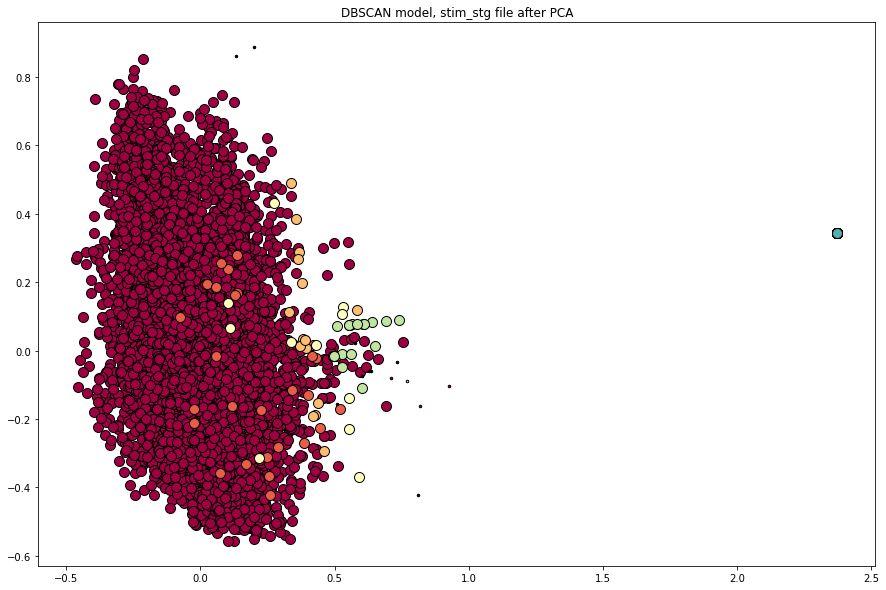

In [85]:
ep = 0.5
min_sam = 5

X2 = reduced_data_stm
db_stm = DBSCAN(eps=ep, min_samples=min_sam).fit(X2)
core_samples_mask = np.zeros_like(db_stm.labels_, dtype=bool)
core_samples_mask[db_stm.core_sample_indices_] = True
labels = db_stm.labels_

n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

print('Estimated number of clusters: %d' % n_clusters_)
print('Estimated number of noise points: %d' % n_noise_)
print("Silhouette Coefficient: %0.3f" % silhouette_score(X2, labels))

fig = plt.gcf()
fig.set_size_inches(15,10)
unique_labels = set(labels)
colors = [plt.cm.Spectral(each)
          for each in np.linspace(0, 1, len(unique_labels))]

for k, col in zip(unique_labels, colors):
    if k == -1:
        col = [0, 0, 0, 1]    #noise_label

    class_member_mask = (labels == k)

    xy = X2[class_member_mask & core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col), markeredgecolor='k', markersize=10)

    xy = X2[class_member_mask & ~core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], '.', markerfacecolor=tuple(col), markeredgecolor='k', markersize=5)

plt.title('DBSCAN model, stim_stg file after PCA')
plt.show()


In [28]:
labels

array([0, 0, 0, ..., 0, 0, 0])